----------------------
#### t-test
------------------------
- 1-sample t-test
- 2-sample t-test
- 1-sample LEFT tailed
- 2-sample LEFT tailed

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white", color_codes=True)

from scipy.stats import ttest_1samp, t

#### Simple usage of One-Sample T-Test
We use a one sample T-test to determine whether our sample mean (observed average) is statistically significantly different to the population mean (expected average).

$$\Large t = \dfrac{\bar{x} – \mu}{SE}$$

Let’s say we want to calculate the resting systolic blood pressure of 20 first-year resident female doctors and compare it to the general public population mean of 120 mmHg.

The `null hypothesis` is that there is no significant difference between the blood pressure of the resident female doctors and the general population.

__Step 1__
$H_0$ : the `null hypothesis` is the mean of the sample is equal to the common belief, $\mu = 120$

$H_a$ : the `alternate hypothesis` is the mean of the sample is NOT equal to the common belief, $\mu != 120$

__Step 2__
- conduct the statistical test
- we get the probability value from the test (p-value)
- if this p-value LESS than 0.05 (5%) 
    - reject the $H_0$

In [7]:
female_doctor_bps = [128, 127, 118, 115, 144, 142, 133, 140, 132, 131, 
                     111, 132, 149, 122, 139, 119, 136, 129, 126, 128]

In [8]:
# Known population mean
pop_mean = 120

In [9]:
# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(female_doctor_bps, pop_mean)

In [10]:
t_statistic, p_value

(4.512403659336718, 0.00023838063630967753)

The p-value in this case is 0.0002, which is far less than the standard thresholds of 0.05 or 0.01, so we reject the null hypothesis and we can say there is a statistically significant difference between the resting systolic blood pressure of the resident female doctors and the general population.

In [11]:
# Set significance level
alpha = 0.05

In [12]:
# Calculate critical value for two-tailed test
df             = len(female_doctor_bps) - 1  # degrees of freedom
critical_value = t.ppf(1 - alpha / 2, df)
critical_value

2.093024054408263

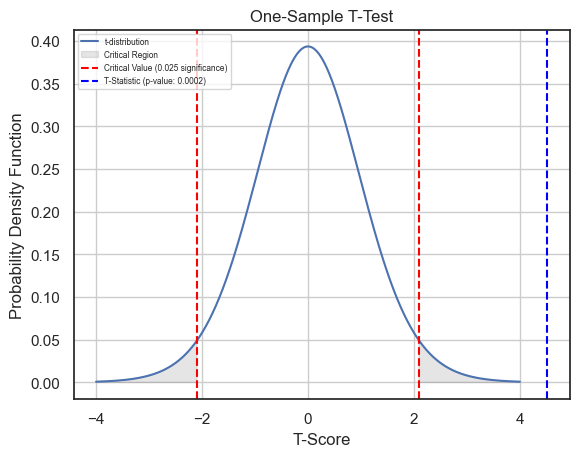

In [16]:
# Plot the t-distribution
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)
plt.plot(x, y, label='t-distribution')

# Shade the area for the critical region
plt.fill_between(x, y, where=(x > critical_value) | (x < -critical_value), color='gray', alpha=0.2, label='Critical Region')

# Plot vertical lines for critical value and t-statistic
plt.axvline(critical_value, color='red', linestyle='--', label=f'Critical Value ({alpha/2} significance)')
plt.axvline(-critical_value, color='red', linestyle='--')
plt.axvline(t_statistic, color='blue', linestyle='--', label=f'T-Statistic (p-value: {p_value:.4f})')

# Set plot parameters
plt.title('One-Sample T-Test')
plt.xlabel('T-Score')
plt.ylabel('Probability Density Function')
plt.legend(loc='upper left', fontsize=6)
plt.grid(True)

- The critical region is shaded, and 
- vertical lines indicate the critical values and the calculated t-statistic.

#### Two-sample T-test
A two sample T-test is used to compare the means of two separate samples.

It is calculated as follows (assuming equal variances):

$$ t = \dfrac{(\bar{x}_1 + \bar{x}_2)}{\sqrt{s_p^2(\dfrac{1}{n_1} + \dfrac{1}{n_2})}} $$

Where $s_p^2$ is the pooled variance, calculated as follows:

$$ s_p^2 = \dfrac{(n_1 – 1)s_1^2 + (n_2 – 2)s_2^2}{n_1 + n_2 – 2} $$

Let’s look at an example to compare the blood pressure of male consultant doctors with the junior resident female doctors we explored above.

Our null hypothesis in this case is that there is no statistically significant difference in the mean of male consulting doctors and junior resident female doctors.

__Step 1__
$H_0$ : the `null hypothesis` is the mean of the sample 1 = mean of sample 2, $\mu_1 = \mu_2$

$H_a$ : the `alternate hypothesis` is the mean of the sample 1 is NOT equal to the mean of sample 2, $\mu_1 != \mu_2$

__Step 2__
- conduct the statistical test
- we get the probability value from the test (p-value)
- if this p-value LESS than 0.05 (5%) 
    - reject the $H_0$

In [18]:
from scipy.stats import ttest_ind, t

In [19]:
female_doctor_bps = [128, 127, 118, 115, 144, 142, 133, 140, 132, 131, 
                     111, 132, 149, 122, 139, 119, 136, 129, 126, 128]

male_consultant_bps = [118, 115, 112, 120, 124, 130, 123, 110, 120, 121,
                      123, 125, 129, 130, 112, 117, 119, 120, 123, 128]


In [20]:
# Perform two-sample t-test
t_statistic, p_value = ttest_ind(female_doctor_bps, male_consultant_bps)
t_statistic, p_value

(3.5143256412718564, 0.0011571376404026158)

The p-value in this case is 0.0012, which again is below than the standard thresholds of 0.05 or 0.01, so we reject the null hypothesis and we can say there is a statistically significant difference between the resting systolic blood pressure of the resident female doctors and the male consultant doctors.

In [21]:
# Calculate critical values for two-tailed test
df_female = len(female_doctor_bps) - 1  # degrees of freedom for female doctor data
df_male   = len(male_consultant_bps) - 1  # degrees of freedom for male consultant data
critical_value_upper = t.ppf(1 - alpha / 2, min(df_female, df_male))
critical_value_lower = -critical_value_upper

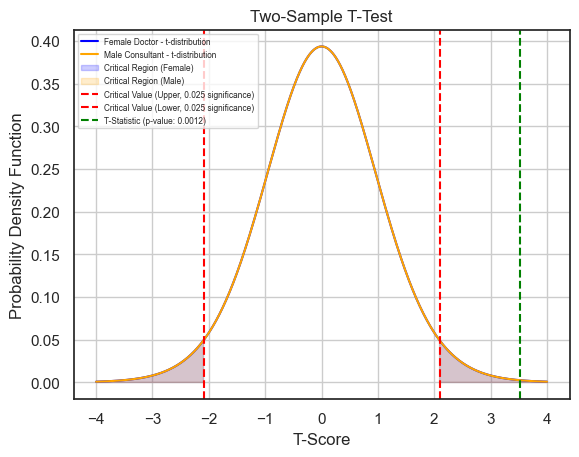

In [23]:
# Plot the t-distribution
x = np.linspace(-4, 4, 1000)
y_female = t.pdf(x, df_female)
y_male = t.pdf(x, df_male)

plt.plot(x, y_female, label='Female Doctor - t-distribution', color='blue')
plt.plot(x, y_male, label='Male Consultant - t-distribution', color='orange')

# Shade the area for the critical region
plt.fill_between(x, y_female, where=(x > critical_value_upper) | (x < critical_value_lower), color='blue', alpha=0.2, label='Critical Region (Female)')
plt.fill_between(x, y_male, where=(x > critical_value_upper) | (x < critical_value_lower), color='orange', alpha=0.2, label='Critical Region (Male)')

# Plot vertical lines for critical values and t-statistic
plt.axvline(critical_value_upper, color='red', linestyle='--', label=f'Critical Value (Upper, {alpha/2} significance)')
plt.axvline(critical_value_lower, color='red', linestyle='--', label=f'Critical Value (Lower, {alpha/2} significance)')
plt.axvline(t_statistic, color='green', linestyle='--', label=f'T-Statistic (p-value: {p_value:.4f})')

# Set plot parameters
plt.title('Two-Sample T-Test')
plt.xlabel('T-Score')
plt.ylabel('Probability Density Function')
plt.legend(loc='upper left', fontsize=6)
plt.grid(True)

#### 1 sample , LEFT tailed

In [88]:
# Given data
female_doctor_bps = [128, 127, 118, 115, 144, 142, 133, 140, 132, 131, 111, 132, 149, 122, 139, 119, 136, 129, 126, 128]

In [89]:
# Hypothesized population mean
hypothesized_mean = 110

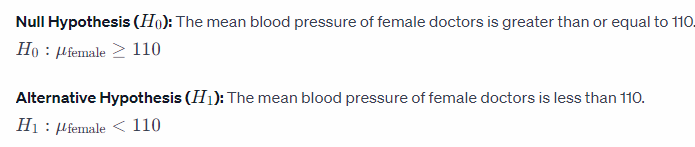

In [90]:
# Perform one-sample left-tailed t-test
t_statistic, p_value = ttest_1samp(female_doctor_bps, hypothesized_mean, alternative='less')
t_statistic, p_value

(9.002357549223994, 0.9999999860930004)

In [91]:
# Significance level
alpha = 0.01

In [92]:
# Calculate critical value for left-tailed test
df             = len(female_doctor_bps) - 1  # degrees of freedom
critical_value = t.ppf(alpha, df)
critical_value

-2.5394831906222888

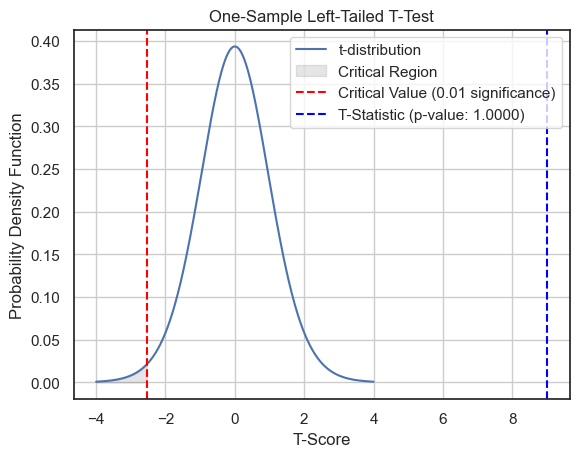

In [93]:
# Plot the t-distribution
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)

plt.plot(x, y, label='t-distribution')

# Shade the area for the critical region
plt.fill_between(x, y, where=(x < critical_value), color='gray', alpha=0.2, label='Critical Region')

# Plot vertical lines for critical value and t-statistic
plt.axvline(critical_value, color='red', linestyle='--', label=f'Critical Value ({alpha} significance)')
plt.axvline(t_statistic, color='blue', linestyle='--', label=f'T-Statistic (p-value: {p_value:.4f})')

# Set plot parameters
plt.title('One-Sample Left-Tailed T-Test')
plt.xlabel('T-Score')
plt.ylabel('Probability Density Function')
plt.legend()
plt.grid(True)

- Conclusion: cannot Reject the null hypothesis.
- Interpretation: There is strong evidence to suggest that the average blood pressure of female doctors is indeed greater= than 110.

#### 1 sample , RIGHT tailed

In [94]:
# Given data
female_doctor_bps = [128, 127, 118, 115, 144, 142, 133, 140, 132, 131, 111, 132, 149, 122, 139, 119, 136, 129, 126, 128]

In [95]:
# Hypothesized population mean
hypothesized_mean = 110

In [96]:
# Significance level
alpha = 0.01

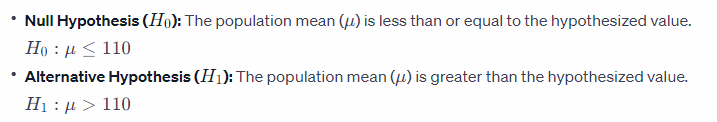

In [97]:
# Perform one-sample right-tailed t-test
t_statistic, p_value = ttest_1samp(female_doctor_bps, hypothesized_mean, alternative='greater')
t_statistic, p_value 

(9.002357549223994, 1.3906999538168327e-08)

In [100]:
# Print the results
print("Null Hypothesis (H0): Population mean is less than or equal to 110")
print("Alternative Hypothesis (H1): Population mean is greater than 110")
print(f"Significance Level: {alpha}")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

Null Hypothesis (H0): Population mean is less than or equal to 110
Alternative Hypothesis (H1): Population mean is greater than 110
Significance Level: 0.01
T-Statistic: 9.002357549223994
P-Value: 1.3906999538168327e-08


In [101]:
# Draw a conclusion
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis")
    print("Interpretation: There is evidence to suggest that the average blood pressure of female doctors is significantly greater than 110.")
else:
    print("Conclusion: Fail to reject the null hypothesis")
    print("Interpretation: There is not enough evidence to suggest that the average blood pressure of female doctors is significantly greater than 110.")

Conclusion: Reject the null hypothesis
Interpretation: There is evidence to suggest that the average blood pressure of female doctors is significantly greater than 110.


In [103]:
# Calculate critical value for right-tailed test
df = len(female_doctor_bps) - 1  # degrees of freedom
critical_value = t.ppf(1 - alpha, df)

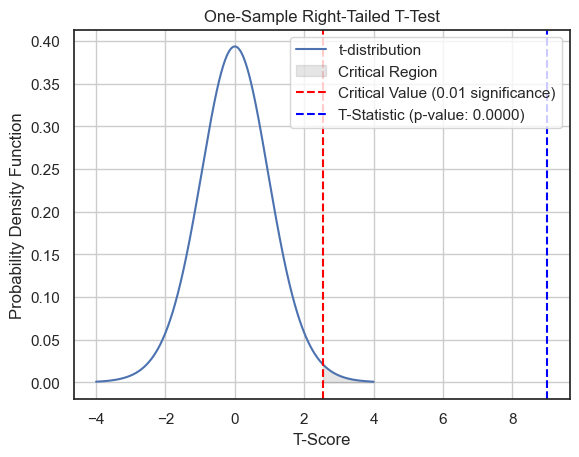

In [104]:
# Plot the t-distribution
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)

plt.plot(x, y, label='t-distribution')

# Shade the area for the critical region
plt.fill_between(x, y, where=(x > critical_value), color='gray', alpha=0.2, label='Critical Region')

# Plot vertical lines for critical value and t-statistic
plt.axvline(critical_value, color='red', linestyle='--', label=f'Critical Value ({alpha} significance)')
plt.axvline(t_statistic, color='blue', linestyle='--', label=f'T-Statistic (p-value: {p_value:.4f})')

# Set plot parameters
plt.title('One-Sample Right-Tailed T-Test')
plt.xlabel('T-Score')
plt.ylabel('Probability Density Function')
plt.legend()
plt.grid(True)

#### two-sample left-tailed t-test 
- with visualization of the t-distribution, critical region, and the t-statistic:

In [105]:
# Given data
female_doctor_bps   = [128, 127, 118, 115, 144, 142, 133, 140, 132, 131, 111, 132, 149, 122, 139, 119, 136, 129, 126, 128]
male_consultant_bps = [118, 115, 112, 120, 124, 130, 123, 110, 120, 121, 123, 125, 129, 130, 112, 117, 119, 120, 123, 128]

In [106]:
# Significance level
alpha = 0.05

In [107]:
# Perform two-sample left-tailed t-test
t_statistic, p_value = ttest_ind(female_doctor_bps, male_consultant_bps, alternative='less')
t_statistic, p_value

(3.5143256412718564, 0.9994214311797988)

In [108]:
# Print the results
print("Null Hypothesis (H0): Female doctor blood pressure is greater than or equal to male consultant blood pressure")
print("Alternative Hypothesis (H1): Female doctor blood pressure is less than male consultant blood pressure")
print(f"Significance Level: {alpha}")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

Null Hypothesis (H0): Female doctor blood pressure is greater than or equal to male consultant blood pressure
Alternative Hypothesis (H1): Female doctor blood pressure is less than male consultant blood pressure
Significance Level: 0.05
T-Statistic: 3.5143256412718564
P-Value: 0.9994214311797988


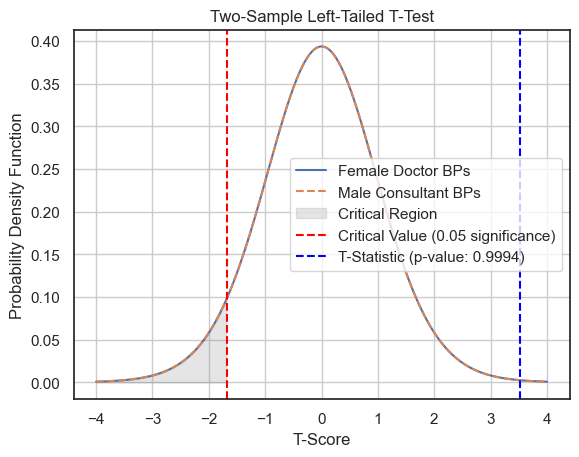

In [110]:
# Calculate critical value for left-tailed test
df_female = len(female_doctor_bps) - 1  # degrees of freedom for female group
df_male = len(male_consultant_bps) - 1  # degrees of freedom for male group
df_total = df_female + df_male  # total degrees of freedom
critical_value = t.ppf(alpha, df_total)

# Plot the t-distribution
x = np.linspace(-4, 4, 1000)
y_female = t.pdf(x, df_female)
y_male = t.pdf(x, df_male)

plt.plot(x, y_female, label='Female Doctor BPs')
plt.plot(x, y_male, label='Male Consultant BPs', linestyle='dashed')

# Shade the area for the critical region
plt.fill_between(x, y_female, where=(x < critical_value), color='gray', alpha=0.2, label='Critical Region')

# Plot vertical lines for critical value and t-statistic
plt.axvline(critical_value, color='red', linestyle='--', label=f'Critical Value ({alpha} significance)')
plt.axvline(t_statistic, color='blue', linestyle='--', label=f'T-Statistic (p-value: {p_value:.4f})')

# Set plot parameters
plt.title('Two-Sample Left-Tailed T-Test')
plt.xlabel('T-Score')
plt.ylabel('Probability Density Function')
plt.legend()
plt.grid(True)

#### Example - 2 groups - LEFT tailed

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind
import ipywidgets as widgets
from ipywidgets import interact, fixed

In [50]:
# Generate dummy data for two groups
np.random.seed(0)
group_a = np.random.normal(loc=10, scale=2, size=30)  # Mean = 10, Standard deviation = 2, Sample size = 30
group_b = np.random.normal(loc=12, scale=2, size=30)  # Mean = 12, Standard deviation = 2, Sample size = 30


In [48]:
def plot_t_distribution(alpha, df, group_a, group_b):
    # Perform left-tailed t-test
    t_statistic, p_value = ttest_ind(group_a, group_b, alternative='less')
    
    # Calculate the critical value for a left-tailed test
    critical_value = t.ppf(alpha, df)
    
    # Define the range for the t-statistic
    t_values = np.linspace(-5, 5, 1000)

    # Calculate the PDF values
    pdf_values = t.pdf(t_values, df)

    # Plot the PDF
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(t_values, pdf_values, label='PDF')
    plt.fill_between(t_values, pdf_values, where=(t_values <= critical_value), color='lightblue', alpha=0.5)
    plt.axvline(t_statistic, color='green', linestyle='--', label=f'T-statistic: {t_statistic:.2f}')
    plt.axvline(critical_value, color='red', linestyle='--', label=f'Critical value: {critical_value:.2f}')
    plt.title('Probability Density Function (PDF)')
    plt.xlabel('t-statistic')
    plt.ylabel('Probability Density')
    plt.legend()

    # Calculate the CDF values
    cdf_values = t.cdf(t_values, df)

    # Plot the CDF
    plt.subplot(1, 2, 2)
    plt.plot(t_values, cdf_values, label='CDF', color='orange')
    plt.axvline(critical_value, color='red', linestyle='--', label=f'Critical value: {critical_value:.2f}')
    plt.fill_between(t_values, cdf_values, where=(t_values <= critical_value), color='lightblue', alpha=0.5)
    plt.title('Cumulative Distribution Function (CDF)')
    plt.xlabel('t-statistic')
    plt.ylabel('Cumulative Probability')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print t-statistic and p-value
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)


In [45]:
# Define the degrees of freedom
df = 58  # degrees of freedom


In [52]:
# Create interactive plot with slider for alpha
interact(plot_t_distribution, 
         alpha=(0.001, 0.5, 0.01), 
         df=fixed(df), 
         group_a=fixed(group_a), 
         group_b=fixed(group_b));

interactive(children=(FloatSlider(value=0.241, description='alpha', max=0.5, min=0.001, step=0.01), Output()),…